# Exercise 3

Generate simulated values from the following distributions
* 1 Exponential Distribution 

In [1]:
import numpy as np

In [2]:
N = 10000

In [3]:
# Exponential distribution
def exp_dist_samp(N, lam):
    U = np.random.rand(N)
    return -np.log(1 - U) / lam

In [4]:
X = exp_dist_samp(N, 1)
print(X)

[1.87370482 2.91879262 0.0574625  ... 1.30862349 0.50519022 3.04641124]


In [5]:
def stand_norm_dist_samp(N):
    i = 0
    X = np.zeros(N)
    while i < N//2:
        V1,V2 = 2*np.random.rand(2) -1
        R2 = V1**2 + V2**2
        if R2 > 1:
            continue
        cos2piu2 = V1/np.sqrt(R2)
        sin2piu2 = V2/np.sqrt(R2)
        U = np.random.rand()
        quantity = np.sqrt(-2*np.log(U))
        
        X[i] = quantity * cos2piu2
        X[-i] = quantity * sin2piu2
        i+= 1
    return X
    

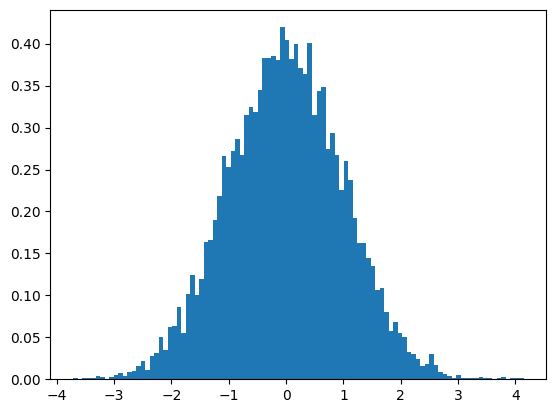

In [6]:
X = stand_norm_dist_samp(N)
#plot histogram
import matplotlib.pyplot as plt
plt.hist(X, bins=100, density=True)
plt.show()


In [7]:
from tests import do_all_tests
results = do_all_tests(X)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Pareto distribution

In [ ]:
def pareto_dist_samp(N, beta, k):
    U = np.random.rand(N)
    return beta / (U**(1/k))

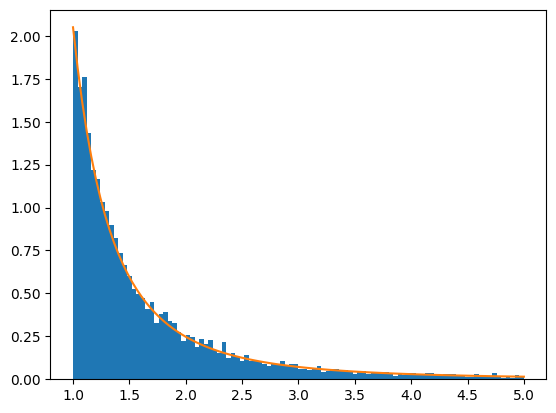

In [ ]:
beta = 1
k = 2.05
#plot histogram
X = pareto_dist_samp(N, beta, k)
_ = plt.hist(X, bins=100, density=True, range=(1,5))
#plot the theoretical distribution
x = np.linspace(1,5,100)
y = k * beta**k / x**(k+1) #probability density function
plt.plot(x,y)
plt.show()

In [ ]:
def KS_test(randn):
    Ftrue = np.arange(0,1,1/len(randn))
    #import uniform distribution cdf
    F = uniform.cdf(randn)
    #calculate max difference
    D = np.max(np.abs(Ftrue - F))
    #calculate p value
    n = len(randn)
    pval = 1 - np.exp(-2*n*D**2)
    return D, pval